In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

data_dir = "../data"
file_paths = {
    "benin": os.path.join(data_dir, "benin-malanville.csv"),
    "sierra_leone": os.path.join(data_dir, "sierraleone-bumbuna.csv"),
    "togo": os.path.join(data_dir, "togo-dapaong_qc.csv"),
}

# Read CSVs into DataFrames

In [3]:
dataframes = {}
for name, path in file_paths.items():
    dataframes[name] = pd.read_csv(path)

for name, df in dataframes.items():
    print(f"Dataframe {name.upper()}:")
    print(df.head())
    print()

Dataframe BENIN:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Da

# Function for comprehensive EDA on each DataFrame

## Summary Statistics

In [19]:
for name, df in dataframes.items():
    print("\nSummary Statistics: {}".format(name.upper()))
    summary = df.describe(include='all')
    print(summary)


Summary Statistics: BENIN
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-08-08 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525

## Data Quality Check

In [21]:
for name, df in dataframes.items():
    print(f"\nMissing values: {name.upper()}")
    print(df.isnull().sum())


Missing values: BENIN
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing values: SIERRA_LEONE
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing 

## Check for outliers (using IQR)

In [22]:
print("\nOutlier Detection (Interquartile Range):")

for name, df in dataframes.items():
    print(f"\nOutliers in {name.upper()}:")
    for col in df.select_dtypes(include=[np.number]):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"- Column: {col}")
        if outliers.empty:
            print("  No outliers detected.")
        else:
            print(f"  Number of outliers: {outliers.shape[0]}")


Outlier Detection (Interquartile Range):

Outliers in BENIN:
- Column: GHI
  Number of outliers: 145
- Column: DNI
  Number of outliers: 15196
- Column: DHI
  Number of outliers: 8733
- Column: ModA
  Number of outliers: 98
- Column: ModB
  Number of outliers: 240
- Column: Tamb
  Number of outliers: 222
- Column: RH
  No outliers detected.
- Column: WS
  Number of outliers: 6717
- Column: WSgust
  Number of outliers: 5368
- Column: WSstdev
  Number of outliers: 107372
- Column: WD
  No outliers detected.
- Column: WDstdev
  Number of outliers: 7251
- Column: BP
  Number of outliers: 10288
- Column: Cleaning
  Number of outliers: 485
- Column: Precipitation
  Number of outliers: 3789
- Column: TModA
  Number of outliers: 1
- Column: TModB
  Number of outliers: 257
- Column: Comments
  No outliers detected.

Outliers in SIERRA_LEONE:
- Column: GHI
  Number of outliers: 15853
- Column: DNI
  Number of outliers: 101688
- Column: DHI
  Number of outliers: 4407
- Column: ModA
  Number of o

## Look for inconsistencies (negative values in positive columns)


In [23]:
print("\nInconsistency Check (Negative Values in Positive Columns):")
for name, df in dataframes.items():
    print(f"\nNegative values in {name.upper()}:")
    for col in df.select_dtypes(include=[np.number]):
        if col in ["GHI", "DNI", "DHI", "WS", "Tamb", "TModA", "TModB"]:
            negatives = df[df[col] < 0]
            if negatives.empty:
                print(f"  Column: {col} - No negative values found.")
            else:
                print(f"  Column: {col} - {negatives.shape[0]} negative values found.")


Inconsistency Check (Negative Values in Positive Columns):

Negative values in BENIN:
  Column: GHI - 258847 negative values found.
  Column: DNI - 275987 negative values found.
  Column: DHI - 259182 negative values found.
  Column: Tamb - No negative values found.
  Column: WS - No negative values found.
  Column: TModA - No negative values found.
  Column: TModB - No negative values found.

Negative values in SIERRA_LEONE:
  Column: GHI - 261135 negative values found.
  Column: DNI - 266352 negative values found.
  Column: DHI - 263128 negative values found.
  Column: Tamb - No negative values found.
  Column: WS - No negative values found.
  Column: TModA - No negative values found.
  Column: TModB - No negative values found.

Negative values in TOGO:
  Column: GHI - 257385 negative values found.
  Column: DNI - No negative values found.
  Column: DHI - No negative values found.
  Column: Tamb - No negative values found.
  Column: WS - No negative values found.
  Column: TModA - N

## Time Series Analysis (Optional)


In [9]:
for name, df in dataframes.items():
    plt.figure(figsize=(12, 6))
    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        plt.plot(df['Timestamp'], df[col], label=col)
    plt.legend()
    plt.title(f"{name} - Time Series")
    plt.show()

## Correlation Analysis

In [24]:
for name, df in dataframes.items():
    print(f"\nCorrelation Matrix: {name.upper()}")
    corr = df.select_dtypes(include=[np.number]).corr()
    print(corr)


Correlation Matrix: BENIN
                    GHI       DNI       DHI      ModA      ModB      Tamb  \
GHI            1.000000  0.882376  0.849989  0.994443  0.994869  0.547513   
DNI            0.882376  1.000000  0.546602  0.892023  0.892012  0.467584   
DHI            0.849989  0.546602  1.000000  0.829923  0.827886  0.503925   
ModA           0.994443  0.892023  0.829923  1.000000  0.998745  0.526868   
ModB           0.994869  0.892012  0.827886  0.998745  1.000000  0.525370   
Tamb           0.547513  0.467584  0.503925  0.526868  0.525370  1.000000   
RH            -0.360029 -0.373475 -0.285018 -0.383205 -0.365718 -0.414842   
WS             0.457349  0.397099  0.426959  0.458483  0.450123  0.347188   
WSgust         0.484144  0.419469  0.450904  0.484429  0.476380  0.362403   
WSstdev        0.446526  0.383303  0.414711  0.443467  0.438523  0.342418   
WD             0.079664  0.018839  0.102752  0.050262  0.061473  0.188081   
WDstdev        0.547242  0.471152  0.505968  0.53

## Wind Analysis


Wind Analysis: BENIN


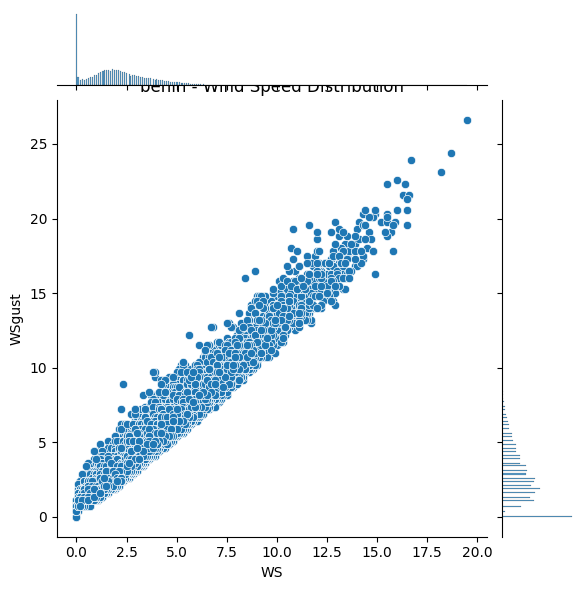


Wind Analysis: SIERRA_LEONE


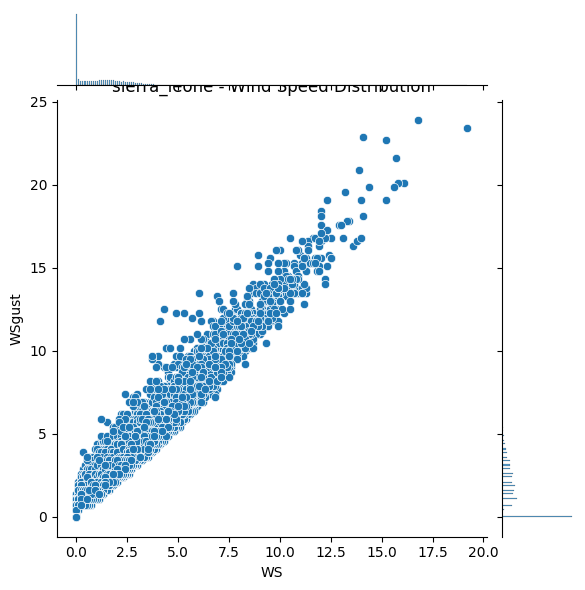


Wind Analysis: TOGO


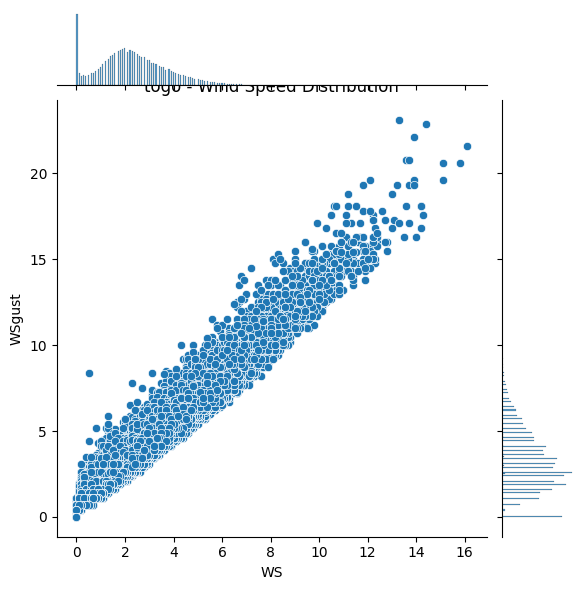

In [25]:
for name, df in dataframes.items():    
    print("\nWind Analysis: {}".format(name.upper()))
    sns.jointplot(x="WS", y="WSgust", data=df)
    plt.title(f"{name} - Wind Speed Distribution")
    plt.show()

## Temperature Analysis


Temperature Analysis: BENIN


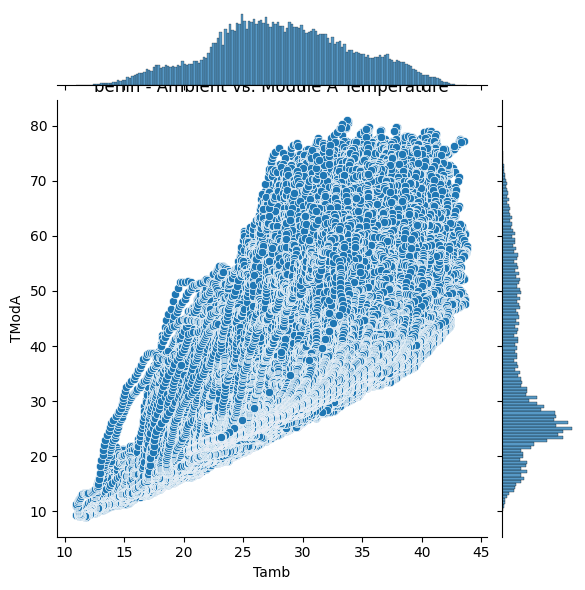


Temperature Analysis: SIERRA_LEONE


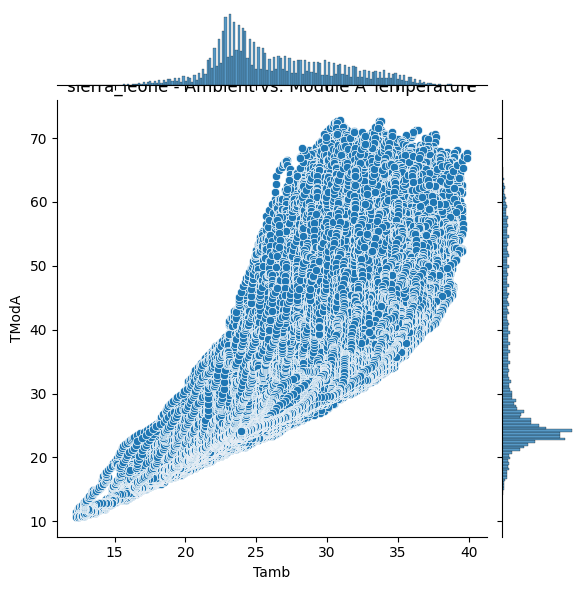


Temperature Analysis: TOGO


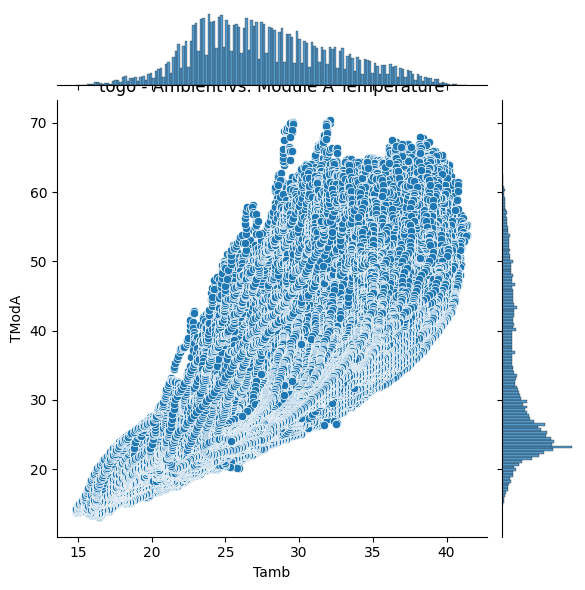

In [26]:
for name, df in dataframes.items():
    print("\nTemperature Analysis: {}".format(name.upper()))
    sns.jointplot(x="Tamb", y="TModA", data=df)
    plt.title(f"{name} - Ambient vs. Module A Temperature")
    plt.show()

## Histograms

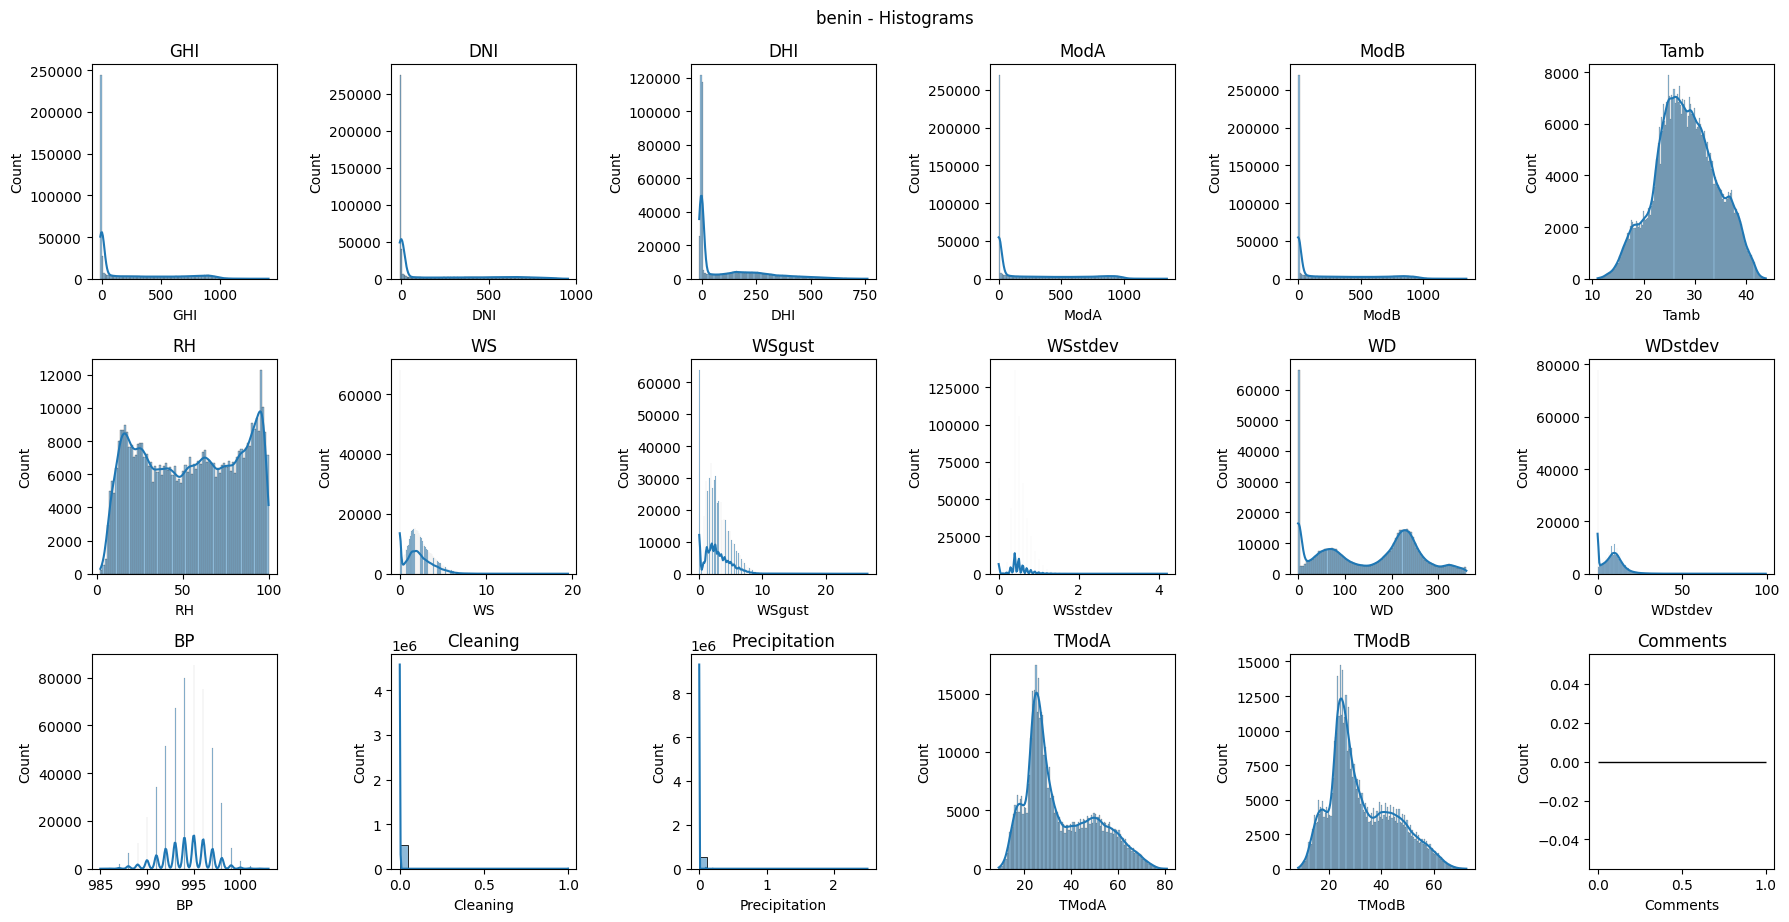

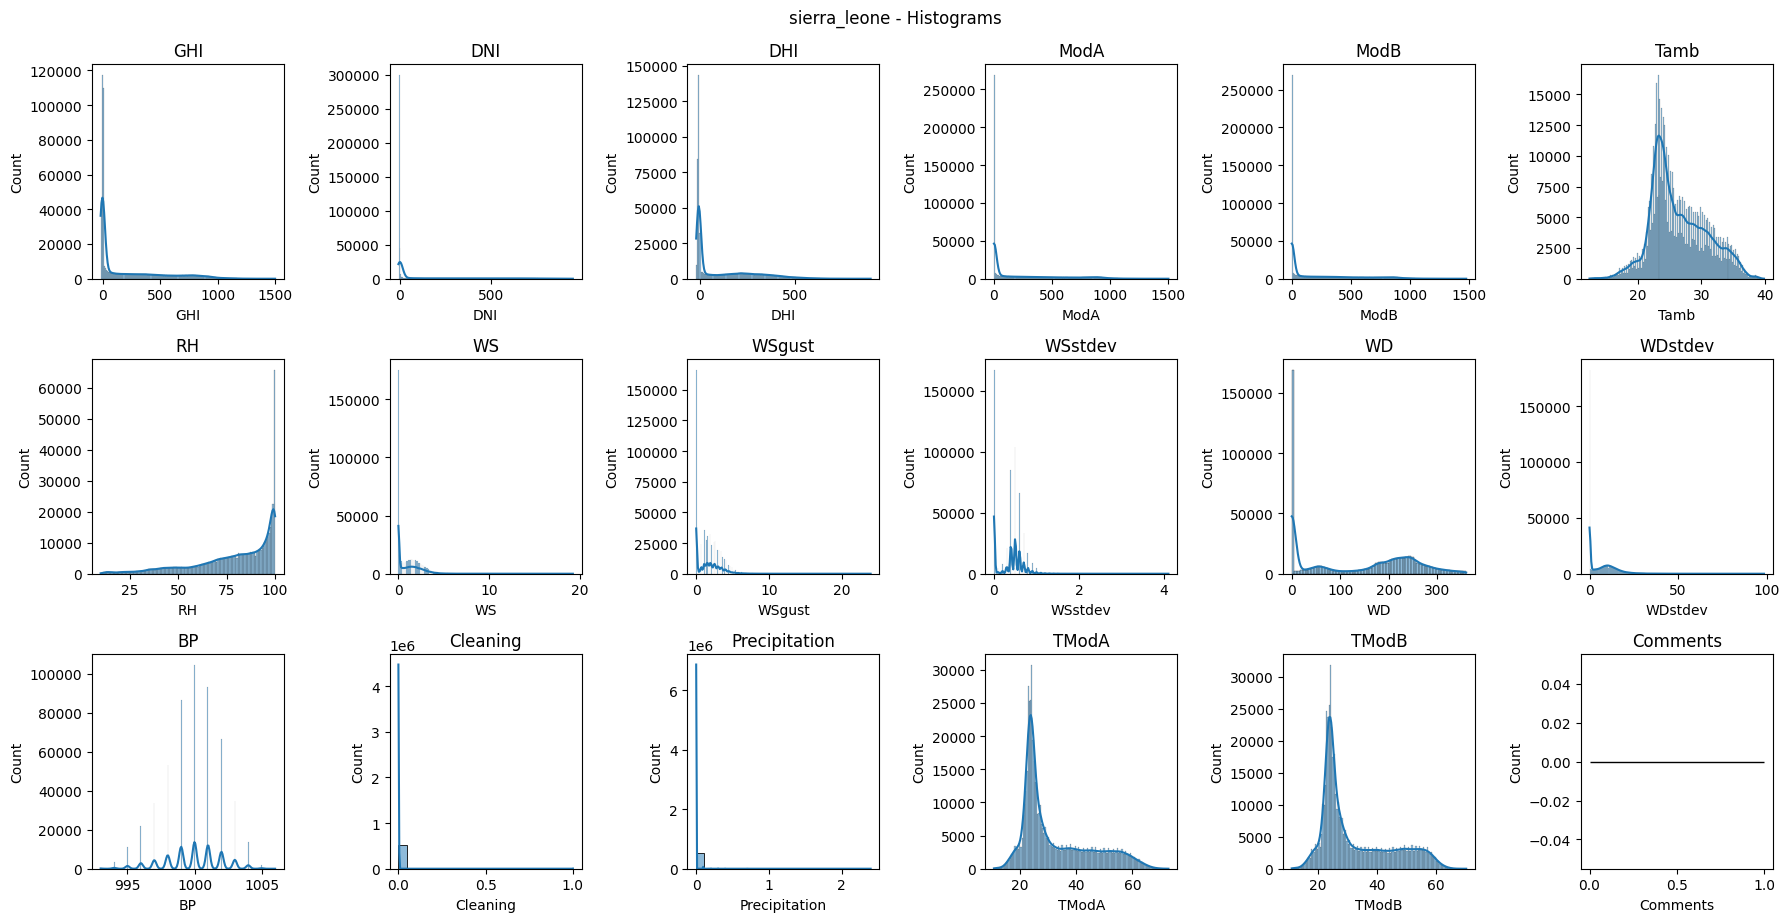

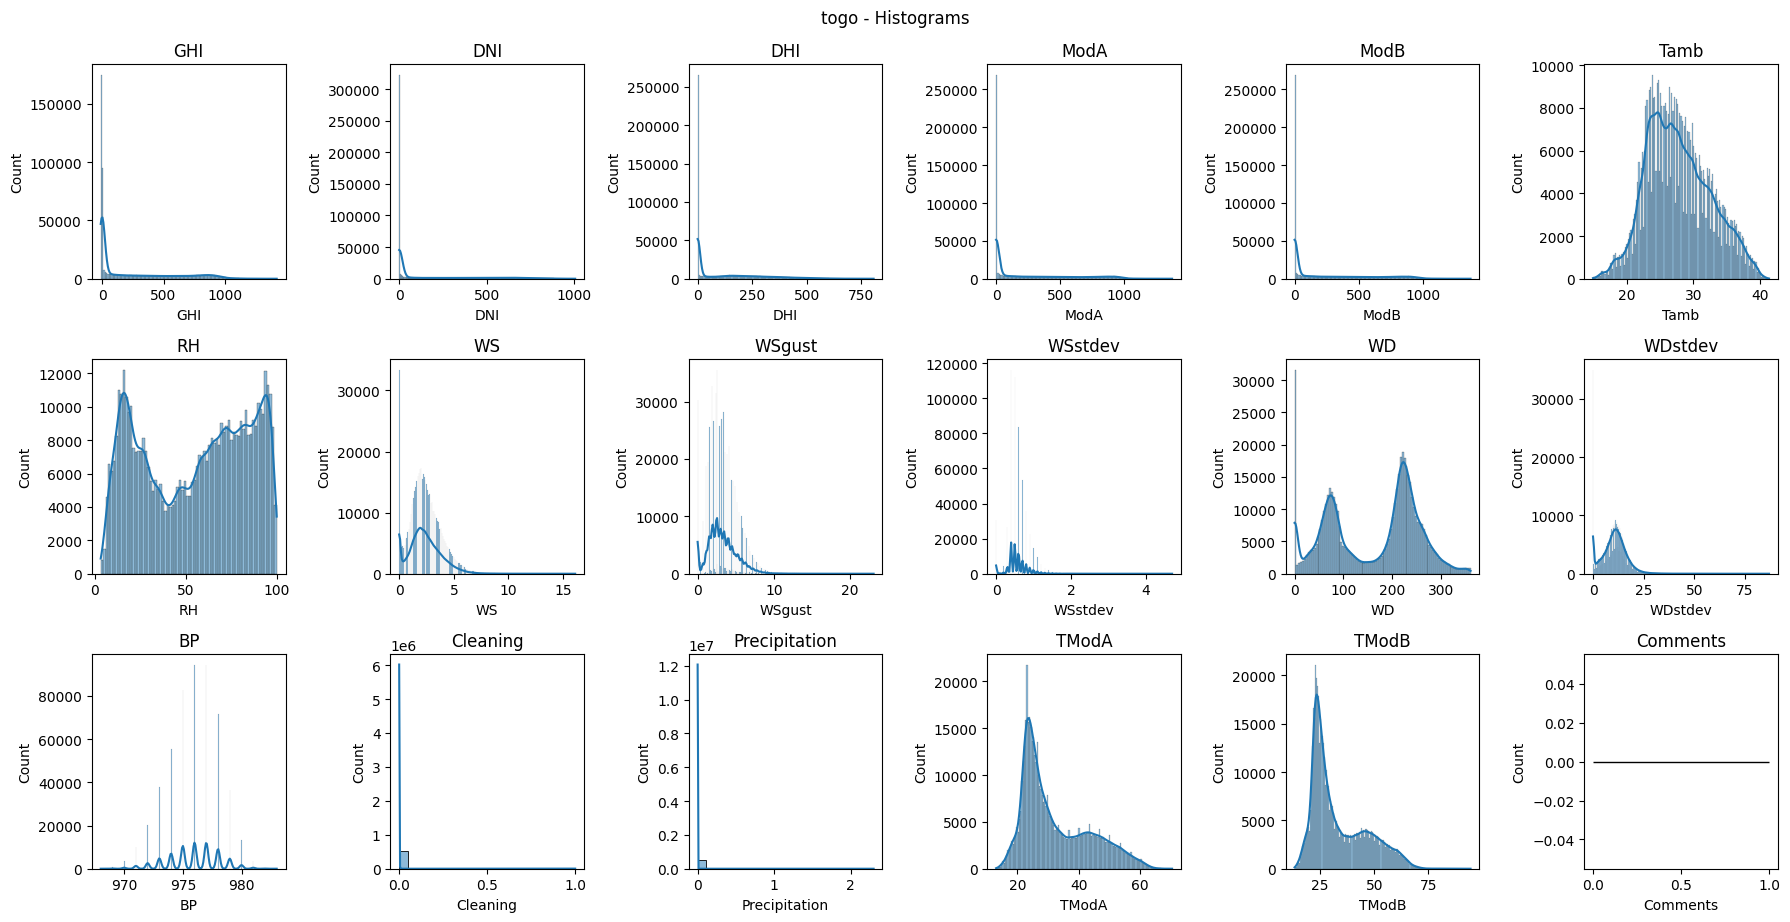

In [33]:
try:
    for name, df in dataframes.items():
        df = df.replace(to_replace=np.inf, value=np.nan)

        numeric_cols = df.select_dtypes(include=[np.number]).columns
        num_cols = len(numeric_cols)
        ncols = 6
        nrows = (num_cols + ncols - 1) // ncols

        plt.figure(figsize=(ncols * 3, nrows * 3))
        for i, col in enumerate(numeric_cols):
            plt.subplot(nrows, ncols, i + 1)
            sns.histplot(df[col], kde=True)
            plt.title(col)
            plt.tight_layout()

        plt.suptitle(f"{name} - Histograms", y=1.02)
        plt.show()

except Exception as e:
    print(f"Error generating histograms: {e}")

## Boxplots


Boxplots: BENIN
Error generating boxplots: List of boxplot statistics and `positions` values must have same the length

Boxplots: SIERRA_LEONE
Error generating boxplots: List of boxplot statistics and `positions` values must have same the length

Boxplots: TOGO
Error generating boxplots: List of boxplot statistics and `positions` values must have same the length


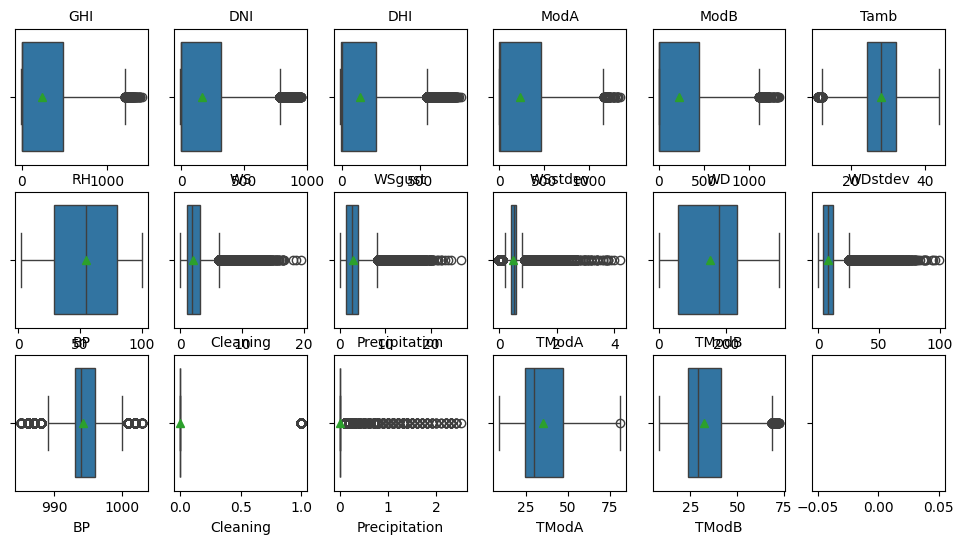

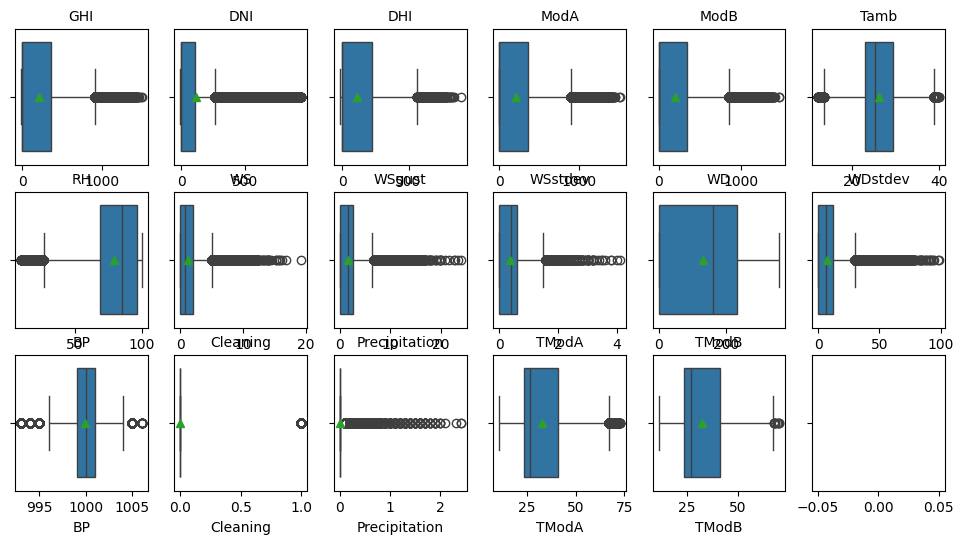

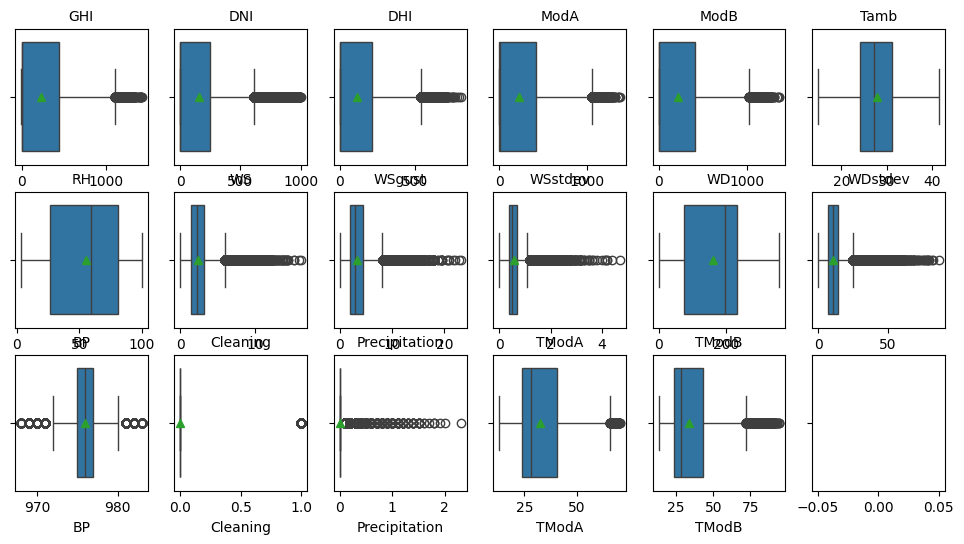

In [36]:
for name, df in dataframes.items():
    print("\nBoxplots: {}".format(name.upper()))
    try:
        df = df.replace(to_replace=np.inf, value=np.nan)
        
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        num_cols = len(numeric_cols)
        ncols = 6
        nrows = (num_cols + ncols - 1) // ncols

        plt.figure(figsize=(ncols * 2, nrows * 2))
        for i, col in enumerate(numeric_cols):
            plt.subplot(nrows, ncols, i + 1)
            sns.boxplot(x=col, showmeans=True, data=df)
            plt.title(col, fontsize=10)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.suptitle(f"{name} - Boxplots", y=1.02, fontsize=14)
        plt.show()
    except Exception as e:
        print(f"Error generating boxplots: {e}")

## Scatter Plots (Optional)

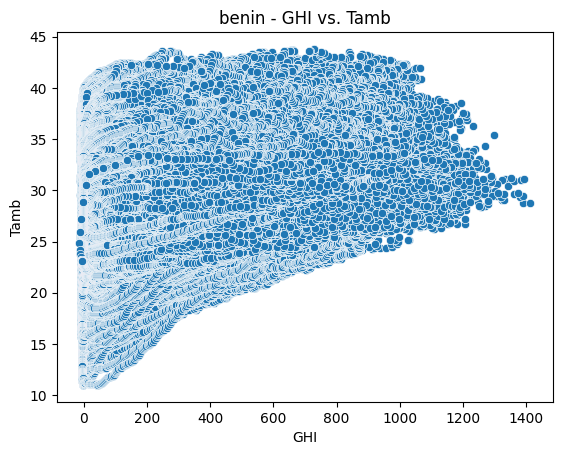

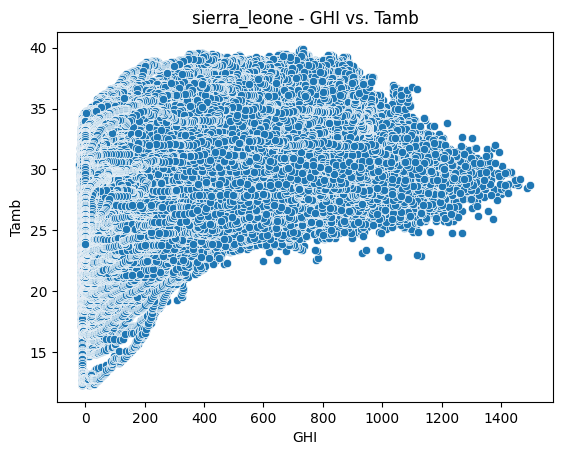

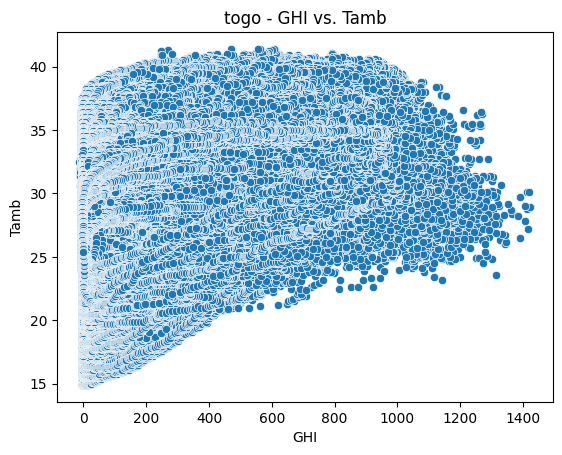

In [31]:
for name, df in dataframes.items():
  try:
      sns.scatterplot(x="GHI", y="Tamb", data=df)
      plt.title(f"{name} - GHI vs. Tamb")
      plt.show()

  except Exception as e:
    print(f"Error generating histograms: {e}")